In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/before_down_BCH2.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [4]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,BCH,down,2018-11-27 00:00:00,BchPulse,0,0,#BCHUSD #BitcoinCash,BCH / USD $182.87 | -0.0254% #BCHUSD #BitcoinCash
1,BCH,down,2018-11-27 00:00:00,BlockPulse360,0,0,#cryptocurrency #bitcoin #bitcoin #BTC #BTC #b...,Global: Are Institutional Investors Accumulati...
2,BCH,down,2018-11-27 00:00:00,CryptoGulp,1,0,NaN,Top 5 Cryptocurrencies Prices Bitcoin $BTC: $3...
3,BCH,down,2018-11-27 00:00:03,BitcoinCash_ES,0,0,#BitcoinCash #Kraken #BCHEUR,Cotización del Bitcoin Cash: 157 30.€ | +2.41%...
4,BCH,down,2018-11-27 00:00:05,Economia_Forex,0,0,#BTC #BTC #bitcoin #bitcoin #ETH #ethereum #BC...,#BTC #bitcoin $3850.22 #ETH #ethereum $110.59 ...
...,...,...,...,...,...,...,...,...
401,BCH,down,2018-11-27 04:48:44,bitnoticia,0,0,NaN,Oportunidades Hard Fork de Bitcoin Cash (BCH) ...
402,BCH,down,2018-11-27 04:50:02,EarlyAdopter23,0,1,#cryptocurrencies #Bitcoin #Bitcoin #XRP #Ethe...,Top 5 #cryptocurrencies Alert Time: 2018-11-27...
403,BCH,down,2018-11-27 04:50:48,TickerTop,0,0,NaN,1: Bitcoin average price is $3752.28921128 (0....
404,BCH,down,2018-11-27 04:55:04,Sandile_S_N,0,0,#cryptocurrency #SatoshisVision #BitcoinABC #H...,I'm expecting a huge bounce in #cryptocurrency...


In [5]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [6]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [8]:
text['text']

0      [bch, usd, $, 182.87, |, 0.0254, %, bchusd, bi...
1      [global, :, are, institutional, investors, acc...
2      [top, 5, cryptocurrencies, prices, bitcoin, $,...
3      [cotización, del, bitcoin, cash, :, 157, 30.€,...
4      [btc, bitcoin, $, 3850.22, eth, ethereum, $, 1...
                             ...                        
401    [oportunidades, hard, fork, de, bitcoin, cash,...
402    [top, 5, cryptocurrencies, alert, time, :, 201...
403    [1, :, bitcoin, average, price, is, $, 3752.28...
404    [i, 'm, expecting, a, huge, bounce, in, crypto...
405    [bitcoin, cash, vs., satoshi, vision, –, hash,...
Name: text, Length: 406, dtype: object

In [9]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [13]:
text['text']

0               [bch, usd, $, |, %, bchusd, bitcoincash]
1      [global, :, institutional, investors, accumula...
2      [top, cryptocurrencies, prices, $, btc, :, $, ...
3      [cotización, del, bitcoin, cash, :, |, %, |, k...
4      [btc, bitcoin, $, ethereum, $, bch, bitcoin, c...
                             ...                        
401    [oportunidades, hard, fork, bitcoin, cash, (, ...
402    [top, cryptocurrencies, alert, time, :, bitcoi...
403    [:, bitcoin, average, price, $, (, %, ), :, xr...
404    ['m, expecting, huge, bounce, cryptocurrency, ...
405    [bitcoin, cash, vs., satoshi, vision, –, hash,...
Name: text, Length: 406, dtype: object

In [14]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [19]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [20]:
article_contents = tokenized_doc.values.tolist()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [22]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [23]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [24]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [25]:
word2id = defaultdict(lambda: 0)

In [26]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [27]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [28]:
len(tf_idf_result)

1041

In [29]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

1041


In [30]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [31]:
sentences = article_contents

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

1041

In [35]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [37]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [38]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [39]:
temp_cluster_result['cluster'] = assigned_clusters

In [40]:
temp_cluster_result['raw_data'] = X.tolist()

In [41]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [42]:
from sklearn.metrics import pairwise_distances

In [43]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [44]:
len(cosine_centroid_list)

1041

In [45]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [46]:
sum(temp_distance[3])

765.4783554883019

In [47]:
import scipy.spatial.distance as dist

In [48]:
dist.cosine(X[0],cosine_centroid_list[0])

0.2385217562088181

In [49]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.03071809509986226

In [50]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 비즈적용

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
519,"[0.008109203539788723, -0.001349322497844696, ...",jump,0,"[0.0020339477, 0.00049917225, -0.001606506, 0....",0.210520,0.003271,1.207249,NaN
667,"[0.008915231563150883, 0.0042794244363904, -0....",nhận,0,"[0.0020339477, 0.00049917225, -0.001606506, 0....",0.229652,0.002181,1.227471,NaN
462,"[0.009053563699126244, 0.003957205917686224, 0...",actualizacion,0,"[0.0020339477, 0.00049917225, -0.001606506, 0....",0.314964,0.002181,1.312783,NaN
672,"[0.008116593584418297, 0.00398189015686512, -0...",daddy,0,"[0.0020339477, 0.00049917225, -0.001606506, 0....",0.338423,0.001090,1.337333,NaN
274,"[0.0024367570877075195, -0.0015496750129386783...",thing,0,"[0.0020339477, 0.00049917225, -0.001606506, 0....",0.351657,0.002181,1.349476,NaN
447,"[0.006058456841856241, -0.0005946709425188601,...",estas,0,"[0.0020339477, 0.00049917225, -0.001606506, 0....",0.356770,0.003271,1.353499,NaN
208,"[0.0026620381977409124, -0.0002711285487748682...",coinnews,0,"[0.0020339477, 0.00049917225, -0.001606506, 0....",0.361963,0.003271,1.358692,NaN
1027,"[0.004111116286367178, 0.0023611856158822775, ...",monitor,0,"[0.0020339477, 0.00049917225, -0.001606506, 0....",0.375898,0.001090,1.374808,NaN
968,"[0.0023529152385890484, 0.0010816942667588592,...",phát,0,"[0.0020339477, 0.00049917225, -0.001606506, 0....",0.386485,0.001090,1.385394,NaN
1009,"[0.0034162942320108414, 0.004040672443807125, ...",kriptopara,0,"[0.0020339477, 0.00049917225, -0.001606506, 0....",0.404191,0.001090,1.403101,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4,"[0.008153918199241161, -0.003368756268173456, ...",investor,1,"[0.0028266388, -0.00044825085, 2.2090564e-05, ...",0.296093,0.002181,1.293913,NaN
275,"[0.002357591176405549, 0.0032664132304489613, ...",interest,1,"[0.0028266388, -0.00044825085, 2.2090564e-05, ...",0.320457,0.002181,1.318276,NaN
57,"[0.007210535928606987, -0.0029683751054108143,...",bitsmart,1,"[0.0028266388, -0.00044825085, 2.2090564e-05, ...",0.346540,0.002181,1.344359,NaN
682,"[0.0043604811653494835, -0.0022251703776419163...",accuse,1,"[0.0028266388, -0.00044825085, 2.2090564e-05, ...",0.359373,0.001090,1.358283,NaN
661,"[0.009888413362205029, 0.0004468785773497075, ...",combine,1,"[0.0028266388, -0.00044825085, 2.2090564e-05, ...",0.369581,0.001090,1.368491,NaN
114,"[0.008001251146197319, -0.0017228552605956793,...",like,1,"[0.0028266388, -0.00044825085, 2.2090564e-05, ...",0.386824,0.003271,1.383553,NaN
648,"[0.0035997293889522552, -0.0005814484902657568...",issue,1,"[0.0028266388, -0.00044825085, 2.2090564e-05, ...",0.397486,0.001090,1.396396,NaN
550,"[0.008885393850505352, 0.003798769786953926, -...",oust,1,"[0.0028266388, -0.00044825085, 2.2090564e-05, ...",0.403856,0.002181,1.401675,NaN
955,"[0.00978049635887146, -0.0016667881282046437, ...",shaira,1,"[0.0028266388, -0.00044825085, 2.2090564e-05, ...",0.404603,0.001090,1.403512,NaN
733,"[0.0070122922770679, 0.0013111670268699527, 0....",adalah,1,"[0.0028266388, -0.00044825085, 2.2090564e-05, ...",0.413966,0.001090,1.412875,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
454,"[0.003351306775584817, 0.0020228056237101555, ...",cada,2,"[0.0032283098, 3.959578e-05, -0.00010784722, 0...",0.283838,0.003271,1.280567,NaN
469,"[0.005108530167490244, 0.002634709933772683, 0...",meet,2,"[0.0032283098, 3.959578e-05, -0.00010784722, 0...",0.321590,0.002181,1.319410,NaN
768,"[0.0029530138708651066, 0.0019980180077254772,...",xpring,2,"[0.0032283098, 3.959578e-05, -0.00010784722, 0...",0.325034,0.001090,1.323944,NaN
977,"[0.004018662963062525, 0.004586691968142986, 0...",giao,2,"[0.0032283098, 3.959578e-05, -0.00010784722, 0...",0.361505,0.002181,1.359324,NaN
944,"[0.009001623839139938, 0.00015953845286276191,...",wrigh,2,"[0.0032283098, 3.959578e-05, -0.00010784722, 0...",0.369613,0.001090,1.368522,NaN
262,"[0.007831120863556862, 0.004447880666702986, -...",bite,2,"[0.0032283098, 3.959578e-05, -0.00010784722, 0...",0.373821,0.002181,1.371640,NaN
1036,"[0.007908610627055168, 0.0008361163781955838, ...",bounce,2,"[0.0032283098, 3.959578e-05, -0.00010784722, 0...",0.376836,0.001090,1.375746,NaN
788,"[0.0052251750603318214, -0.005144583992660046,...",weiter,2,"[0.0032283098, 3.959578e-05, -0.00010784722, 0...",0.382932,0.001090,1.381842,NaN
806,"[0.005896429531276226, 0.0023756129667162895, ...",initialcoinoffering,2,"[0.0032283098, 3.959578e-05, -0.00010784722, 0...",0.389556,0.002181,1.387375,NaN
527,"[0.0037054517306387424, -0.0031112919095903635...",game,2,"[0.0032283098, 3.959578e-05, -0.00010784722, 0...",0.407677,0.001090,1.406587,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
6,"[0.14963576197624207, -0.006238705012947321, -...",bitcoin,3,"[0.011156053, -0.0007516532, -0.0036071283, 0....",0.001683,0.761066,0.240617,NaN
22,"[0.09698604047298431, -0.006509869825094938, -...",cash,3,"[0.011156053, -0.0007516532, -0.0036071283, 0....",0.004101,0.420876,0.583225,NaN
10,"[0.07776932418346405, -0.007650342304259539, -...",crypto,3,"[0.011156053, -0.0007516532, -0.0036071283, 0....",0.005418,0.191902,0.813516,NaN
13,"[0.07566548883914948, -0.007696076296269894, -...",ethereum,3,"[0.011156053, -0.0007516532, -0.0036071283, 0....",0.005508,0.180998,0.824510,NaN
21,"[0.06674929708242416, 0.0004299009742680937, -...",price,3,"[0.011156053, -0.0007516532, -0.0036071283, 0....",0.007580,0.173366,0.834214,NaN
1,"[0.07288344204425812, -0.0029584267176687717, ...",bitcoincash,3,"[0.011156053, -0.0007516532, -0.0036071283, 0....",0.005444,0.162462,0.842981,NaN
206,"[0.04271242395043373, -0.0034955712035298347, ...",fork,3,"[0.011156053, -0.0007516532, -0.0036071283, 0....",0.017144,0.121029,0.896115,NaN
26,"[0.06679185479879379, -0.00015394945512525737,...",litecoin,3,"[0.011156053, -0.0007516532, -0.0036071283, 0....",0.006259,0.105764,0.900495,NaN
8,"[0.07225024700164795, -0.0017209529178217053, ...",cryptocurrency,3,"[0.011156053, -0.0007516532, -0.0036071283, 0....",0.005581,0.088318,0.917263,NaN
27,"[0.051512159407138824, -0.007069087121635675, ...",ripple,3,"[0.011156053, -0.0007516532, -0.0036071283, 0....",0.008798,0.088318,0.920480,NaN


In [56]:
y_km = temp_cluster_result['cluster'].values

In [57]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

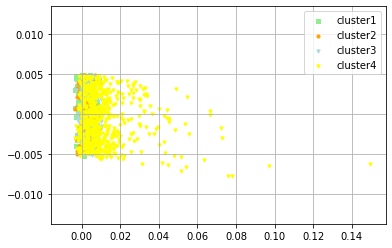

In [58]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 비즈

155

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 기타

136

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 이슈

133

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 투자

617

In [101]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [102]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [103]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 7 # 비즈

In [104]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 13 # 기타

In [105]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 5 # 이슈

In [106]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 11 # 투자

In [107]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [108]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [109]:
kmeans.inertia_

1.107013463973999

In [110]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[0 1 0 ... 0 0 0]


In [111]:
cluster_values= list(model.wv.vocab)

In [112]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1.1070133447647095


In [113]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [114]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.28225112


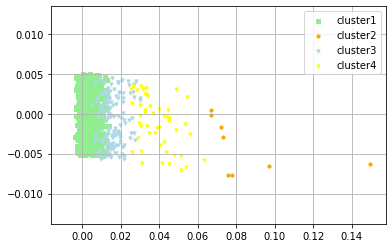

In [115]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [116]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [117]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [118]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [119]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [120]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [121]:
import scipy.spatial.distance as dist

In [122]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [123]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [124]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
63,"[0.0021095271222293377, 0.0007055410533212125,...",transaction,0,"[0.0037526833, -0.0002715996, -0.0010750777, 0...",0.028410,0.007632,1.020778,NaN
259,"[0.004029522649943829, 0.004297991748899221, 0...",historic,0,"[0.0037526833, -0.0002715996, -0.0010750777, 0...",0.024816,0.002181,1.022636,NaN
622,"[0.0005040260148234665, 0.004842418245971203, ...",consequence,0,"[0.0037526833, -0.0002715996, -0.0010750777, 0...",0.030508,0.007632,1.022875,NaN
23,"[0.003213573480024934, -0.0017828443087637424,...",cotización,0,"[0.0037526833, -0.0002715996, -0.0010750777, 0...",0.028482,0.005452,1.023030,NaN
33,"[0.006816008593887091, -0.0026873380411416292,...",prezzo,0,"[0.0037526833, -0.0002715996, -0.0010750777, 0...",0.026412,0.003271,1.023141,NaN
493,"[0.01009147334843874, 0.0018999471794813871, 0...",giảm,0,"[0.0037526833, -0.0002715996, -0.0010750777, 0...",0.025955,0.002181,1.023774,NaN
86,"[0.003657517023384571, -0.004285072907805443, ...",bitcoinprice,0,"[0.0037526833, -0.0002715996, -0.0010750777, 0...",0.029551,0.005452,1.024100,NaN
941,"[0.001444835215806961, 0.0012427441542968154, ...",dust,0,"[0.0037526833, -0.0002715996, -0.0010750777, 0...",0.026565,0.002181,1.024384,NaN
330,"[0.0030473130755126476, -0.0009914861293509603...",moneybutton,0,"[0.0037526833, -0.0002715996, -0.0010750777, 0...",0.026677,0.002181,1.024496,NaN
511,"[0.005914994515478611, 0.0008029091404750943, ...",shit,0,"[0.0037526833, -0.0002715996, -0.0010750777, 0...",0.026701,0.002181,1.024521,NaN


In [125]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 거래소가격

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
6,"[0.14963576197624207, -0.006238705012947321, -...",bitcoin,1,"[0.08484143, -0.0040623024, -0.02653126, 0.006...",0.240290,0.761066,0.479224,NaN
22,"[0.09698604047298431, -0.006509869825094938, -...",cash,1,"[0.08484143, -0.0040623024, -0.02653126, 0.006...",0.048057,0.420876,0.627182,NaN
10,"[0.07776932418346405, -0.007650342304259539, -...",crypto,1,"[0.08484143, -0.0040623024, -0.02653126, 0.006...",0.043641,0.191902,0.851739,NaN
13,"[0.07566548883914948, -0.007696076296269894, -...",ethereum,1,"[0.08484143, -0.0040623024, -0.02653126, 0.006...",0.046681,0.180998,0.865682,NaN
1,"[0.07288344204425812, -0.0029584267176687717, ...",bitcoincash,1,"[0.08484143, -0.0040623024, -0.02653126, 0.006...",0.035602,0.162462,0.873140,NaN
21,"[0.06674929708242416, 0.0004299009742680937, -...",price,1,"[0.08484143, -0.0040623024, -0.02653126, 0.006...",0.080320,0.173366,0.906954,NaN
8,"[0.07225024700164795, -0.0017209529178217053, ...",cryptocurrency,1,"[0.08484143, -0.0040623024, -0.02653126, 0.006...",0.043744,0.088318,0.955426,NaN
26,"[0.06679185479879379, -0.00015394945512525737,...",litecoin,1,"[0.08484143, -0.0040623024, -0.02653126, 0.006...",0.078463,0.105764,0.972699,NaN


In [126]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
290,"[0.02417796291410923, -0.0007367157959379256, ...",reddit,2,"[0.015355567, -0.00082604634, -0.0048637865, 0...",0.048450,0.069783,0.978668,NaN
297,"[0.019719723612070084, -0.001358039560727775, ...",reddits,2,"[0.015355567, -0.00082604634, -0.0048637865, 0...",0.034259,0.028349,1.005910,NaN
983,"[0.02475050464272499, 0.0025510259438306093, -...",climb,2,"[0.015355567, -0.00082604634, -0.0048637865, 0...",0.047328,0.030530,1.016798,NaN
293,"[0.01409226469695568, 0.0017978869145736098, -...",bchsv,2,"[0.015355567, -0.00082604634, -0.0048637865, 0...",0.025310,0.007632,1.017678,NaN
288,"[0.01612127386033535, -0.004373190924525261, -...",仮想通貨,2,"[0.015355567, -0.00082604634, -0.0048637865, 0...",0.028395,0.009813,1.018582,NaN
183,"[0.011478327214717865, -0.00300419214181602, -...",precios,2,"[0.015355567, -0.00082604634, -0.0048637865, 0...",0.029440,0.009813,1.019626,NaN
46,"[0.014578153379261494, -0.0038481643423438072,...",iota,2,"[0.015355567, -0.00082604634, -0.0048637865, 0...",0.034130,0.014175,1.019955,NaN
182,"[0.017788447439670563, -0.0026996212545782328,...",análisis,2,"[0.015355567, -0.00082604634, -0.0048637865, 0...",0.027756,0.007632,1.020123,NaN
359,"[0.02096220664680004, 2.9520015232264996e-05, ...",average,2,"[0.015355567, -0.00082604634, -0.0048637865, 0...",0.047872,0.027259,1.020613,NaN
24,"[0.013471377082169056, -0.00451018288731575, -...",kraken,2,"[0.015355567, -0.00082604634, -0.0048637865, 0...",0.032639,0.011994,1.020645,NaN


In [127]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
206,"[0.04271242395043373, -0.0034955712035298347, ...",fork,3,"[0.038791083, -0.0011925009, -0.013230637, 0.0...",0.036241,0.121029,0.915212,NaN
145,"[0.030640991404652596, -0.004668310284614563, ...",wright,3,"[0.038791083, -0.0011925009, -0.013230637, 0.0...",0.047494,0.100312,0.947182,NaN
144,"[0.030522547662258148, -0.0015364763094112277,...",craig,3,"[0.038791083, -0.0011925009, -0.013230637, 0.0...",0.055043,0.103583,0.951460,NaN
153,"[0.03340447321534157, -0.001595027162693441, -...",lead,3,"[0.038791083, -0.0011925009, -0.013230637, 0.0...",0.034775,0.078505,0.956270,NaN
156,"[0.03527602553367615, 0.00098239176440984, -0....",analysis,3,"[0.038791083, -0.0011925009, -0.013230637, 0.0...",0.031522,0.071963,0.959559,NaN
28,"[0.04263949394226074, -0.00027691313880495727,...",monero,3,"[0.038791083, -0.0011925009, -0.013230637, 0.0...",0.029660,0.054518,0.975143,NaN
112,"[0.048791252076625824, 0.0031155841425061226, ...",cardano,3,"[0.038791083, -0.0011925009, -0.013230637, 0.0...",0.042329,0.059969,0.982359,NaN
108,"[0.04510047286748886, -0.0005652573890984058, ...",tron,3,"[0.038791083, -0.0011925009, -0.013230637, 0.0...",0.034181,0.047975,0.986205,NaN
27,"[0.051512159407138824, -0.007069087121635675, ...",ripple,3,"[0.038791083, -0.0011925009, -0.013230637, 0.0...",0.074771,0.088318,0.986452,NaN
20,"[0.038739901036024094, -0.001843649079091847, ...",cryptocurrencies,3,"[0.038791083, -0.0011925009, -0.013230637, 0.0...",0.030122,0.042524,0.987598,NaN


In [128]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 기술

832

In [129]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 거래소가격

8

In [130]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 이슈

153

In [131]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 투자

48

In [132]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [133]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 9 # 기술

In [134]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 12 # 거래소가격

In [135]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 5 # 이슈

In [136]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 11 # 투자

In [137]:
temp_cluster_result1['Silhouette'] = 0.29549643
temp_cluster_result['Silhouette'] = 0.29549643
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [138]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/before_down_BCH2_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/before_down_BCH2_cosine")